In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wbdata import get_data
import datetime
import statsmodels.api as sm
import numpy as np

In [ ]:
!pip install wbdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.2.1 which is incompatible.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wbdata import get_data
import datetime
import statsmodels.api as sm

In [ ]:
countries = ['KEN', 'NGA', 'EGY', 'ZAF', 'SEN', 'ETH']  # Kenya + 5 regions
indicators = {
    'SH.XPD.CHEX.PC.CD': 'health_expenditure_per_capita',
    'SH.IMM.IDPT': 'immunization_dpt',
    'SH.DYN.MORT': 'under5_mortality'
}
start = datetime.datetime(2004, 1, 1)
end = datetime.datetime(2024, 12, 31)

In [ ]:
!pip install wbdata

import wbdata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
import os


In [ ]:
countries = ['KEN', 'NGA', 'EGY', 'ZAF', 'SEN', 'ETH']  # Kenya + 5 regions
indicators = {
    'SH.XPD.CHEX.PC.CD': 'health_expenditure_per_capita',
    'SH.IMM.IDPT': 'immunization_dpt',
    'SH.DYN.MORT': 'under5_mortality'
}
start = datetime.datetime(2004, 1, 1)
end = datetime.datetime(2024, 12, 31)

In [ ]:
data_file = "health_data_raw.csv"

try:
    print("Fetching data from World Bank API...")
    df = wbdata.get_dataframe(indicators, country=countries, date=(start, end))
    df.reset_index(inplace=True)
    df.rename(columns={'country': 'Country', 'date': 'Year'}, inplace=True)
    df['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year
    df.to_csv(data_file, index=False)
    print(f"✅ Data successfully fetched and saved as {data_file}")

except Exception as e:
    print(f"⚠️ Could not fetch data from API. Error: {e}")
    if os.path.exists(data_file):
        print("🔁 Loading previously saved data from local file...")
        df = pd.read_csv(data_file)
    else:
        raise SystemExit("❌ No local file found. Please check your internet connection or try again later.")

Fetching data from World Bank API...
✅ Data successfully fetched and saved as health_data_raw.csv


In [ ]:
print("\nPreview of dataset:")
print(df.head())
print(f"\nRows: {df.shape[0]} | Columns: {df.shape[1]}")


Preview of dataset:
            Country  Year  health_expenditure_per_capita  immunization_dpt  \
0  Egypt, Arab Rep.  2024                            NaN              97.0   
1  Egypt, Arab Rep.  2023                            NaN              96.0   
2  Egypt, Arab Rep.  2022                     170.979095              97.0   
3  Egypt, Arab Rep.  2021                     176.936646              96.0   
4  Egypt, Arab Rep.  2020                     148.352692              94.0   

   under5_mortality  
0               NaN  
1              17.5  
2              18.1  
3              18.7  
4              19.4  

Rows: 126 | Columns: 5


In [ ]:
df = df.dropna(subset=['health_expenditure_per_capita', 'under5_mortality'])
df = df.sort_values(['Country', 'Year'])
df.head()

,Country,Year,health_expenditure_per_capita,immunization_dpt,under5_mortality
20,"Egypt, Arab Rep.",2004,50.330845,97.0,37.5
19,"Egypt, Arab Rep.",2005,59.468388,98.0,35.7
18,"Egypt, Arab Rep.",2006,66.327072,98.0,34.1
17,"Egypt, Arab Rep.",2007,73.294540,98.0,32.7
16,"Egypt, Arab Rep.",2008,90.157700,97.0,31.2


In [ ]:
print("\nDescriptive statistics by country:")
print(df.groupby('Country')[['health_expenditure_per_capita', 'under5_mortality']].describe())


Descriptive statistics by country:
                 health_expenditure_per_capita                         \
                                         count        mean        std   
Country                                                                 
Egypt, Arab Rep.                          19.0  119.484227  39.124748   
Ethiopia                                  19.0   18.670918   7.168637   
Kenya                                     19.0   64.333344  18.824519   
Nigeria                                   19.0   74.752295  15.207967   
Senegal                                   19.0   55.077086  10.789562   
South Africa                              19.0  520.683542  86.787365   

                                                                              \
                         min         25%         50%         75%         max   
Country                                                                        
Egypt, Arab Rep.   50.330845   94.530834  118.014816  145.524696  

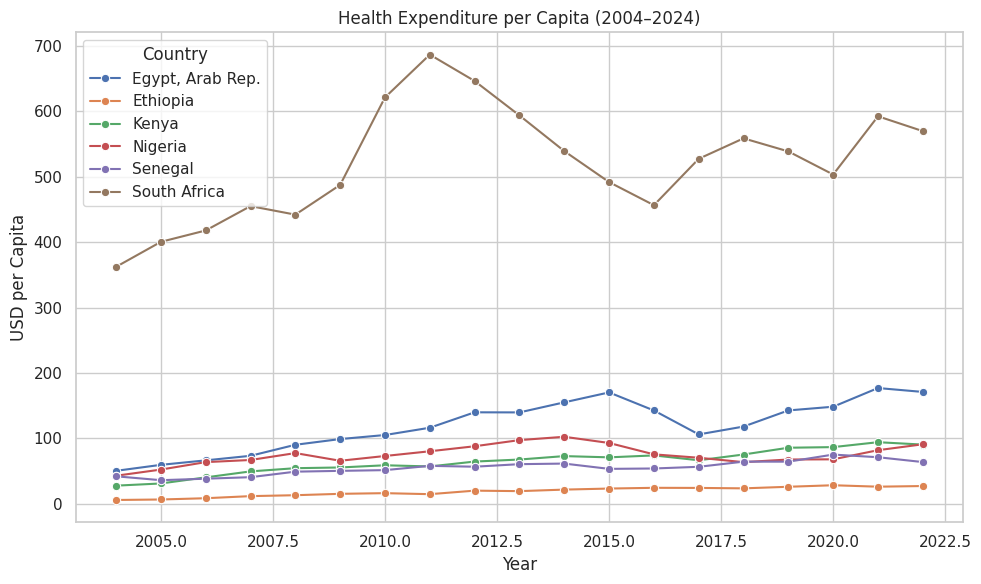

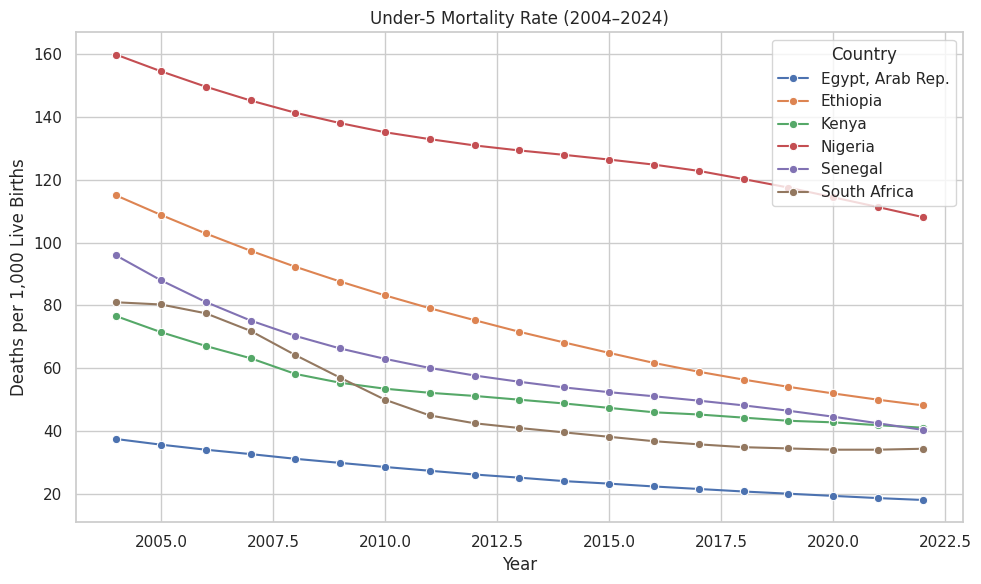

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='health_expenditure_per_capita', hue='Country', marker='o')
plt.title('Health Expenditure per Capita (2004–2024)')
plt.xlabel('Year')
plt.ylabel('USD per Capita')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='under5_mortality', hue='Country', marker='o')
plt.title('Under-5 Mortality Rate (2004–2024)')
plt.xlabel('Year')
plt.ylabel('Deaths per 1,000 Live Births')
plt.tight_layout()
plt.show()


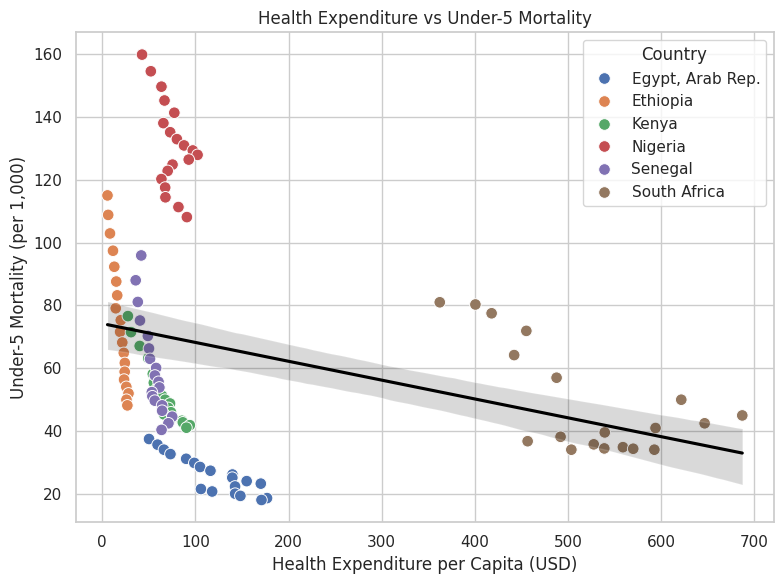

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='health_expenditure_per_capita', y='under5_mortality', hue='Country', s=70)
sns.regplot(data=df, x='health_expenditure_per_capita', y='under5_mortality', scatter=False, color='black')
plt.title('Health Expenditure vs Under-5 Mortality')
plt.xlabel('Health Expenditure per Capita (USD)')
plt.ylabel('Under-5 Mortality (per 1,000)')
plt.tight_layout()
plt.show()

In [ ]:
df_reg = df[['Country', 'Year', 'health_expenditure_per_capita', 'under5_mortality']].dropna()

In [ ]:
df_reg['ln_health_exp'] = np.log(df_reg['health_expenditure_per_capita'])
df_reg['ln_mortality'] = np.log(df_reg['under5_mortality'])

In [ ]:
X = sm.add_constant(df_reg['ln_health_exp'])
y = df_reg['ln_mortality']
model = sm.OLS(y, X).fit()

print("\n=== OLS Regression Results (Pooled) ===")
print(model.summary())


=== OLS Regression Results (Pooled) ===
                            OLS Regression Results                            
Dep. Variable:           ln_mortality   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     22.69
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           5.74e-06
Time:                        17:19:18   Log-Likelihood:                -81.315
No. Observations:                 114   AIC:                             166.6
Df Residuals:                     112   BIC:                             172.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const

In [ ]:
# Re-create df_reg including the Country column and log-transformed columns
df_reg = df[['Country', 'Year', 'health_expenditure_per_capita', 'under5_mortality']].dropna().copy()
df_reg['ln_health_exp'] = np.log(df_reg['health_expenditure_per_capita'])
df_reg['ln_mortality'] = np.log(df_reg['under5_mortality'])


df_reg = pd.get_dummies(df_reg, columns=['Country'], drop_first=True)
X_fe = sm.add_constant(df_reg.drop(columns=['ln_mortality', 'under5_mortality', 'health_expenditure_per_capita']))
y_fe = df_reg['ln_mortality']

# Convert boolean columns to integer type for statsmodels
for col in X_fe.columns:
    if X_fe[col].dtype == bool:
        X_fe[col] = X_fe[col].astype(int)

model_fe = sm.OLS(y_fe, X_fe).fit()
print("\n=== OLS Regression with Country Fixed Effects ===")
print(model_fe.summary())


=== OLS Regression with Country Fixed Effects ===
                            OLS Regression Results                            
Dep. Variable:           ln_mortality   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     749.5
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           3.38e-87
Time:                        17:23:25   Log-Likelihood:                 131.72
No. Observations:                 114   AIC:                            -247.4
Df Residuals:                     106   BIC:                            -225.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Pooled OLS Regression Results (Cell hKIQT9NmjBif)

R-squared: 0.168: This indicates that about 16.8% of the variation in the natural log of under-5 mortality can be explained by the natural log of health expenditure per capita in this simple pooled model, without considering country-specific effects.
ln_health_exp coefficient: -0.2090: This coefficient is negative and statistically significant (P>|t| is 0.000, which is less than 0.05). This suggests that, on average, a 1% increase in health expenditure per capita is associated with approximately a 0.209% decrease in under-5 mortality.
Interpretation: The pooled model suggests a statistically significant negative relationship between health expenditure and under-5 mortality, but it explains a relatively small portion of the variation in mortality. This model doesn't account for the unobserved characteristics of each country that might influence both health expenditure and mortality.
OLS Regression with Country Fixed Effects (Cell EiEW-bBPjuz8)

R-squared: 0.980: This is a very high R-squared value, indicating that the model with country fixed effects explains about 98% of the variation in the natural log of under-5 mortality. This suggests that country-specific factors play a very significant role in explaining under-5 mortality rates.
ln_health_exp coefficient: -0.1268: This coefficient is also negative and statistically significant (P>|t| is 0.001, which is less than 0.05). This suggests that, within a country, a 1% increase in health expenditure per capita is associated with approximately a 0.127% decrease in under-5 mortality. The magnitude of this effect is smaller than in the pooled model.
Year coefficient: -0.0341: This coefficient is negative and statistically significant (P>|t| is 0.000). This captures a general time trend across all countries, suggesting that over time, under-5 mortality has been decreasing, independent of changes in health expenditure and country-specific factors.
Country Dummy Variables (e.g., Country_Ethiopia, Country_Kenya, etc.): These coefficients capture the average difference in the natural log of under-5 mortality for each country compared to the base country (which is likely 'Egypt, Arab Rep.' since drop_first=True was used and Egypt comes first alphabetically), after accounting for health expenditure and the time trend. All these coefficients are positive and highly statistically significant, indicating that there are significant differences in average under-5 mortality rates across these countries that are not explained by health expenditure or the general time trend.
Interpretation: The fixed effects model is a much better fit for the data, as indicated by the high R-squared. It confirms a statistically significant negative relationship between health expenditure per capita and under-5 mortality within countries, but also highlights the substantial influence of unobserved country-specific factors and a general downward trend in mortality over time. The smaller coefficient for ln_health_exp in the fixed effects model compared to the pooled model suggests that some of the negative correlation observed in the pooled model was likely due to differences between countries (e.g., countries with generally higher health expenditure also tend to have lower under-5 mortality for reasons beyond just the expenditure level).
Overall Findings:

The analysis suggests that while increased health expenditure per capita is associated with lower under-5 mortality within countries, a large portion of the variation in under-5 mortality is explained by persistent differences between countries and a general improvement in mortality over time. This implies that simply increasing health expenditure might not be sufficient to significantly reduce under-5 mortality; country-specific contexts and broader temporal factors play a crucial role. The significant country fixed effects suggest that factors unique to each nation (like healthcare system efficiency, public health programs, education levels, infrastructure, etc.) are very important determinants of under-5 mortality.

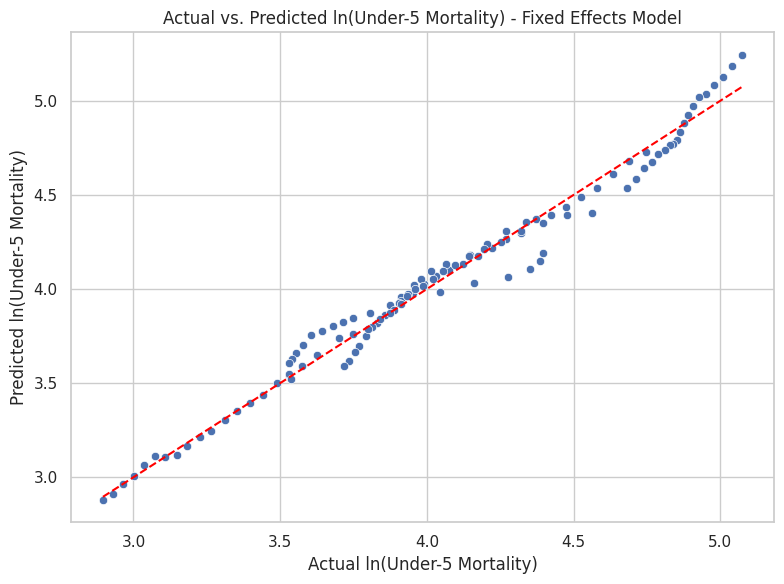

In [29]:
# Get predicted values from the fixed effects model
predicted_fe = model_fe.predict(X_fe)

# Create a DataFrame for plotting
plot_df_fe = pd.DataFrame({'Actual ln(Mortality)': y_fe, 'Predicted ln(Mortality)': predicted_fe})

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_df_fe, x='Actual ln(Mortality)', y='Predicted ln(Mortality)')
plt.title('Actual vs. Predicted ln(Under-5 Mortality) - Fixed Effects Model')
plt.xlabel('Actual ln(Under-5 Mortality)')
plt.ylabel('Predicted ln(Under-5 Mortality)')
plt.plot([min(plot_df_fe['Actual ln(Mortality)']), max(plot_df_fe['Actual ln(Mortality)'])],
         [min(plot_df_fe['Actual ln(Mortality)']), max(plot_df_fe['Actual ln(Mortality)'])],
         color='red', linestyle='--') # Add a 45-degree line for perfect prediction
plt.tight_layout()
plt.show()

The scatter plot of actual vs. predicted log-transformed under-5 mortality from the fixed effects model shows a strong positive correlation between the actual and predicted values. The points cluster closely around the red dashed 45-degree line, which represents perfect prediction. This visually reinforces the high R-squared value observed in the regression summary, indicating that the fixed effects model is very effective at predicting the log-transformed under-5 mortality rates based on the included variables (Year, log health expenditure, and country fixed effects).